In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the data
dataset= pd.read_csv("train.csv")
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


#### In Data Analysis We will Analyze To Find out the below stuff
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(SalePrice)


# Missing values

In [3]:
features_with_na=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1]
features_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [4]:
for el in features_with_na:
    print(el, dataset[el].isnull().sum(), 'missing values')

LotFrontage 259 missing values
Alley 1369 missing values
MasVnrType 8 missing values
MasVnrArea 8 missing values
BsmtQual 37 missing values
BsmtCond 37 missing values
BsmtExposure 38 missing values
BsmtFinType1 37 missing values
BsmtFinType2 38 missing values
FireplaceQu 690 missing values
GarageType 81 missing values
GarageYrBlt 81 missing values
GarageFinish 81 missing values
GarageQual 81 missing values
GarageCond 81 missing values
PoolQC 1453 missing values
Fence 1179 missing values
MiscFeature 1406 missing values


###### find relationship between missing values and the target value(SalesPrices)

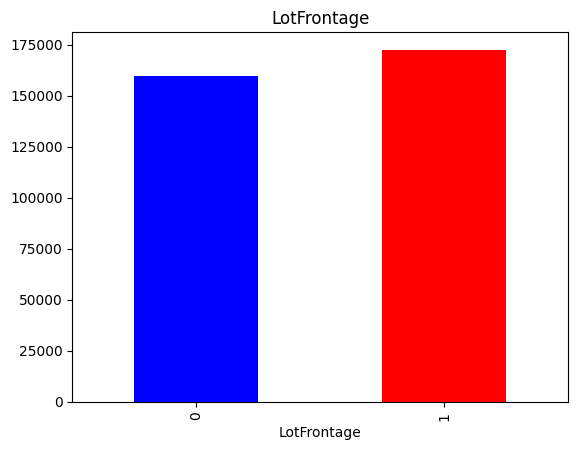

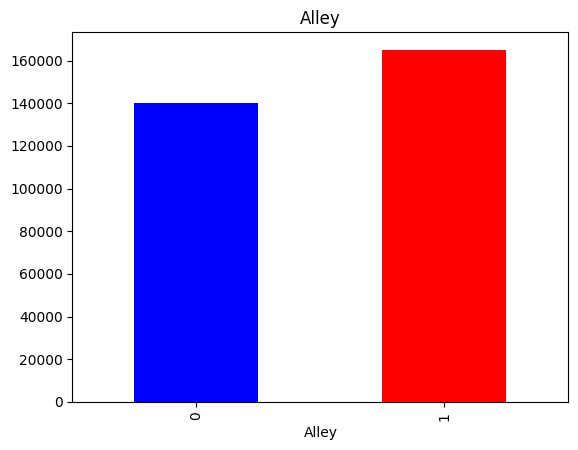

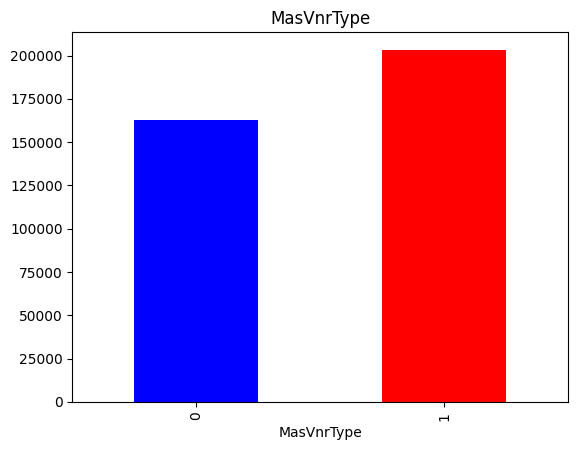

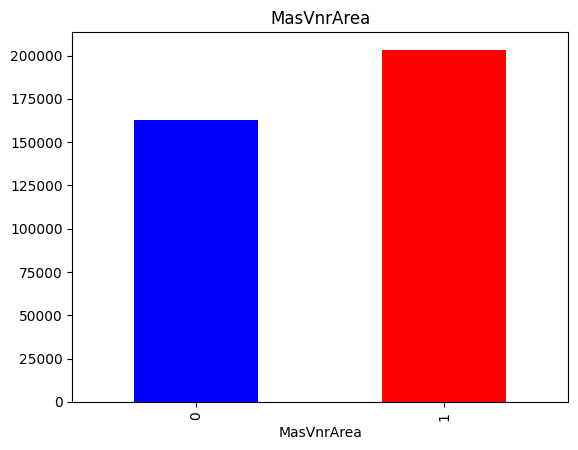

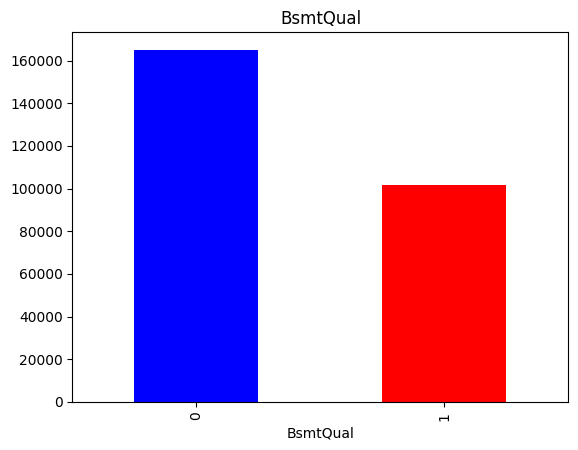

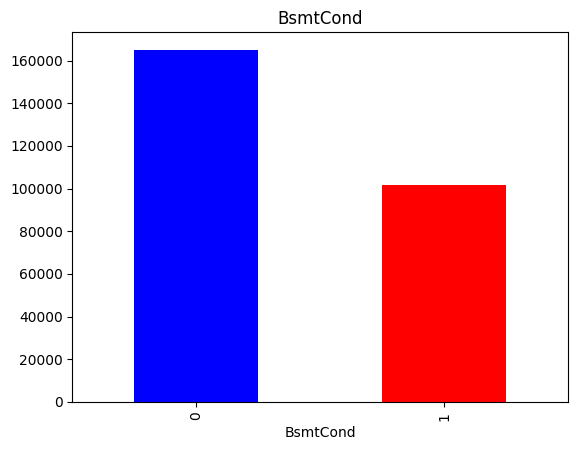

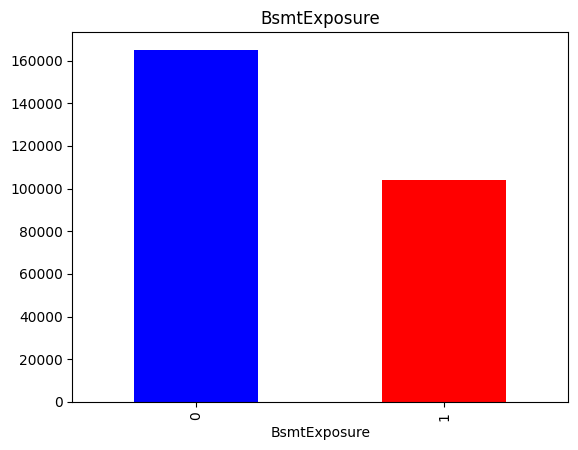

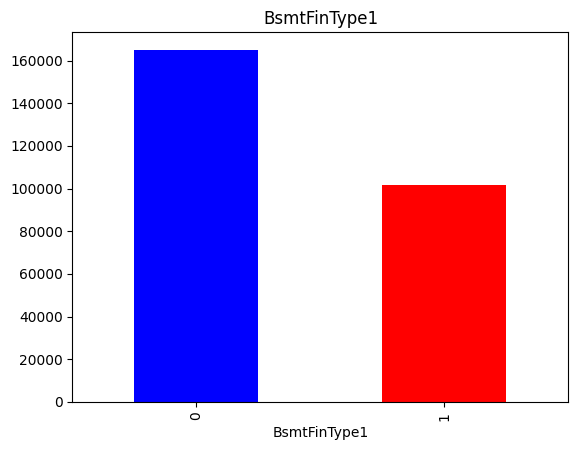

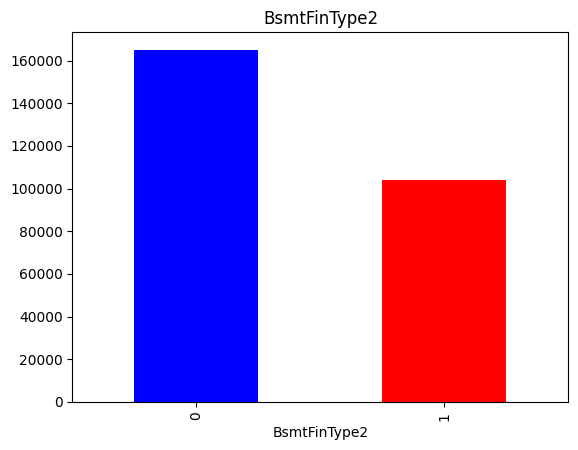

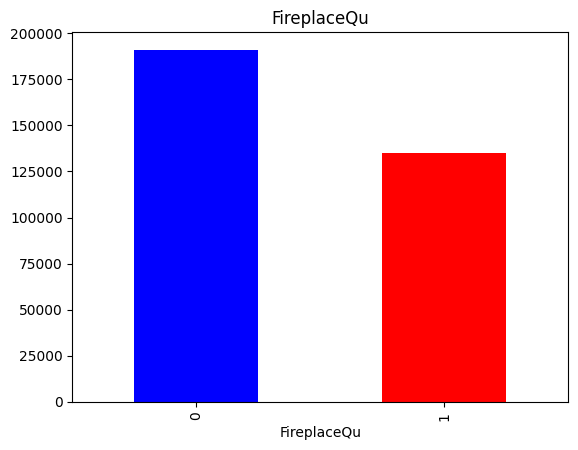

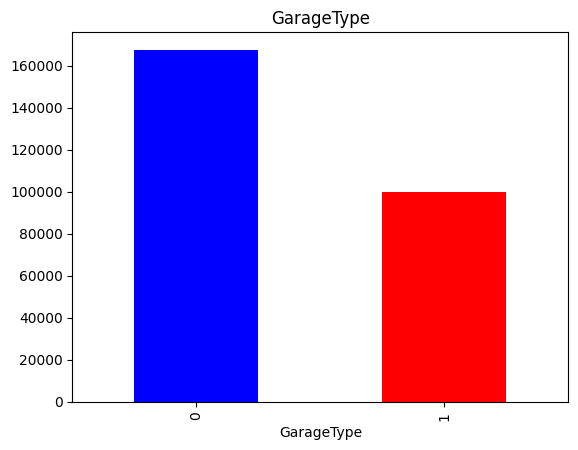

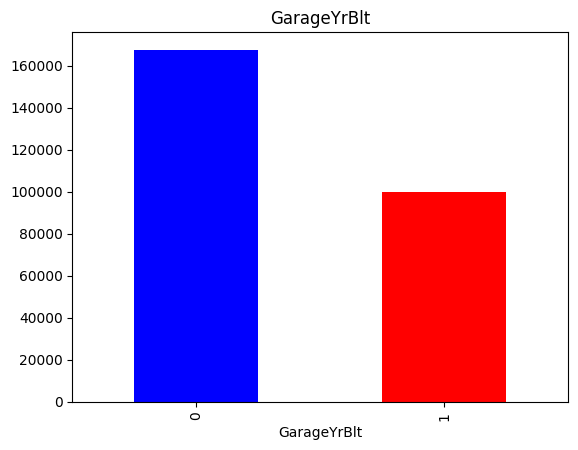

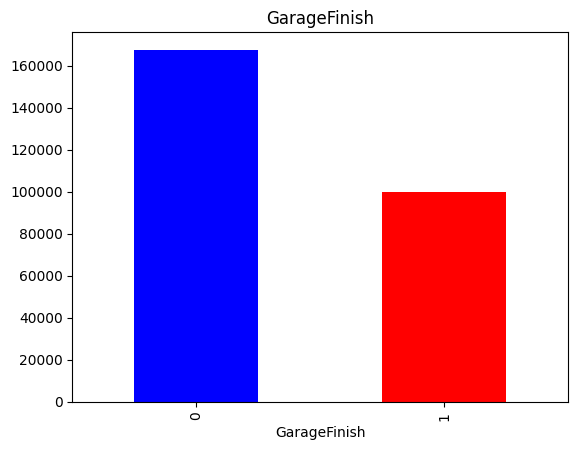

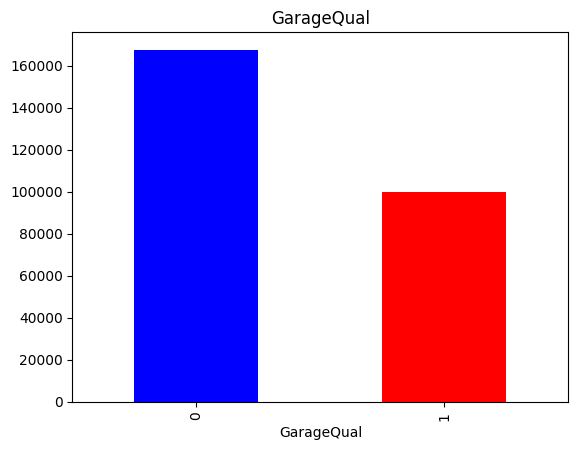

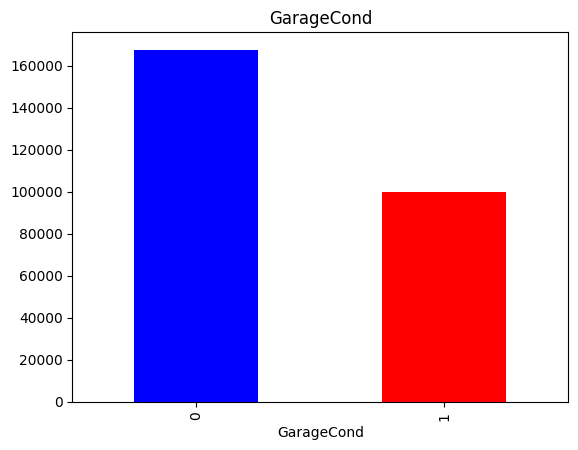

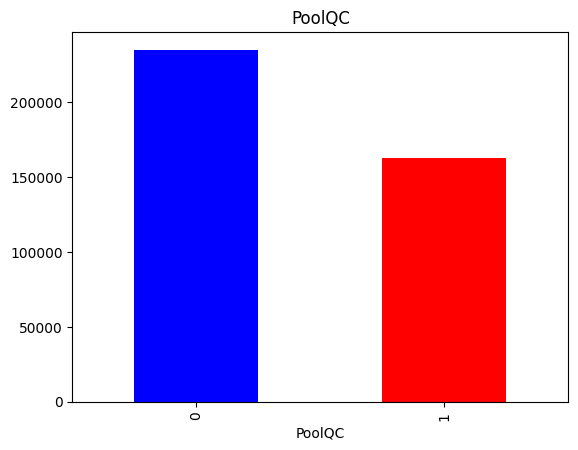

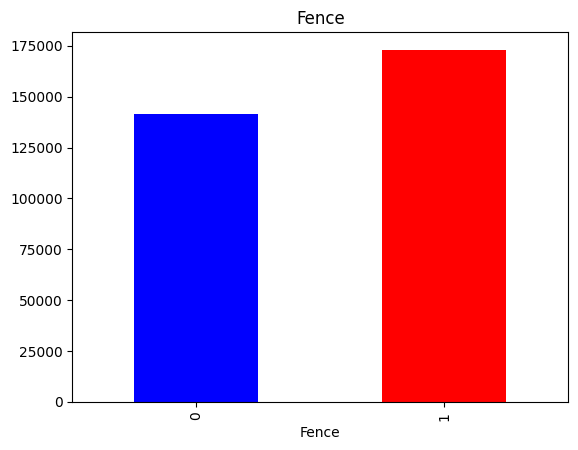

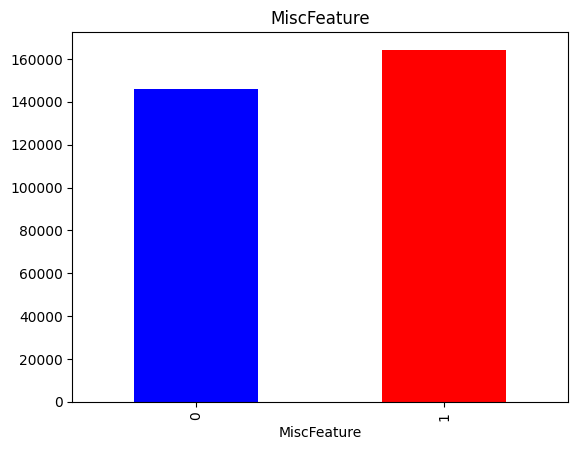

In [5]:
import seaborn as sns
for features in features_with_na:
    data= dataset.copy()
    data[features]=np.where(data[features].isnull(), 1, 0)
    bar_colors = ['blue', 'red']
    #bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']
    #ax.bar(label=bar_labels, color=bar_colors)
    
    data.groupby(features)['SalePrice'].median().plot.bar(color=bar_colors)
    plt.title(features)
    plt.show()

#### The diffrent bars show us the quantity of missing value and we realize how huge and important they are. We need to replace these missing values with some meaningful values

# Numerical Values

In [6]:
numerical_var=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']

print("number of numerical variables in the dataset: ", len(numerical_var))

number of numerical variables in the dataset:  38


In [7]:
dataset[numerical_var].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [8]:
cat_var=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']

print("number of categorical features  in the dataset: ", len(cat_var))

number of categorical features  in the dataset:  43


In [9]:
dataset[numerical_var].columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [10]:
year_feature=[feature for feature in numerical_var if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [11]:
for feature in year_feature:
    print(feature, dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 0, 'Year of Sold')

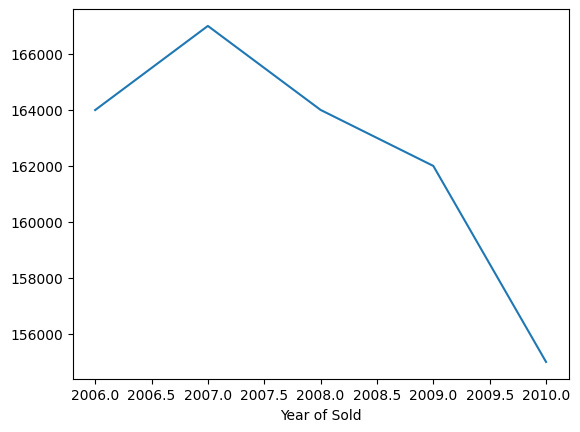

In [12]:
dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year of Sold')
plt.xlabel('Median House prices')
plt.xlabel('Year of Sold')

In [13]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

### Cardinality of Categorical Variables

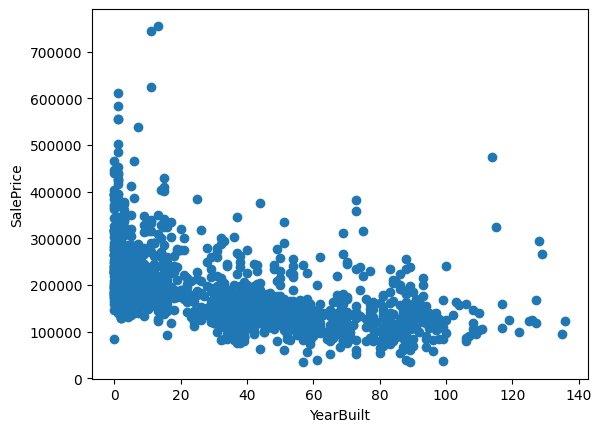

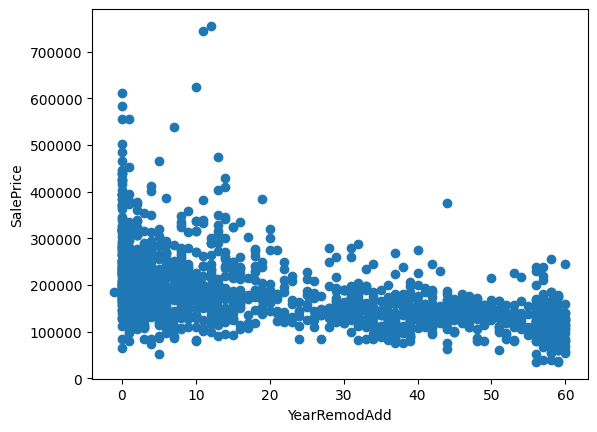

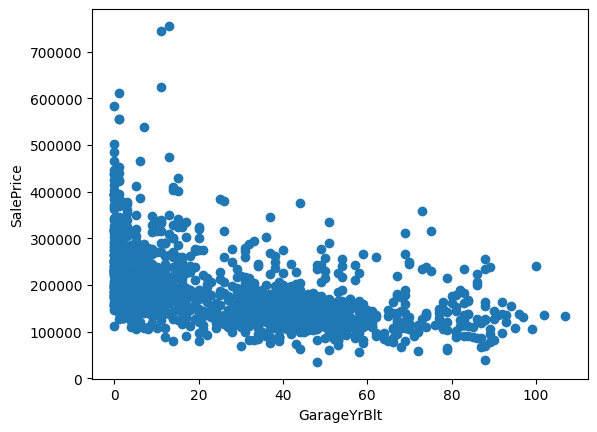

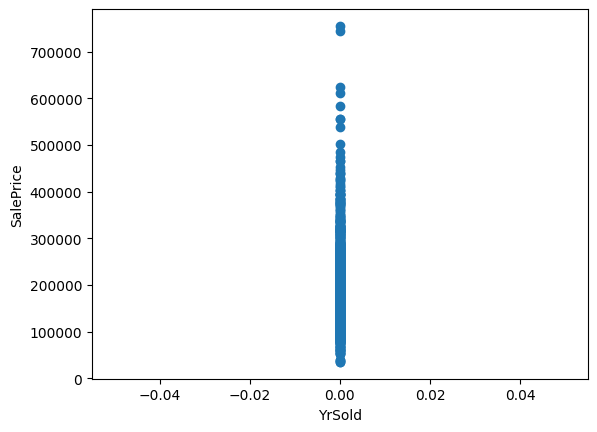

In [14]:
for feature in year_feature:
    
    if feature!='YearSold':
        data= dataset.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]= data['YrSold']-data[feature]
        plt.scatter(data[feature], data['SalePrice'])
        
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

In [15]:
numerical_var

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [16]:
discrete_var=[feature for feature in numerical_var if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
discrete_var

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [17]:
print("length of discrete variables is: ", len(discrete_var))

length of discrete variables is:  17


In [18]:
dataset[discrete_var]

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,0,0,0,2,1,3,1,7,1,2,0,0,0,8
1456,20,6,6,0,1,0,2,0,3,1,7,2,2,0,0,0,2
1457,70,7,9,0,0,0,2,0,4,1,9,2,1,0,0,2500,5
1458,20,5,6,0,1,0,1,0,2,1,5,0,1,0,0,0,4


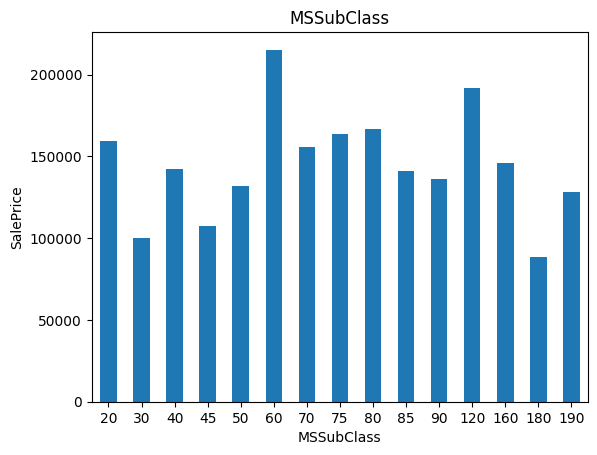

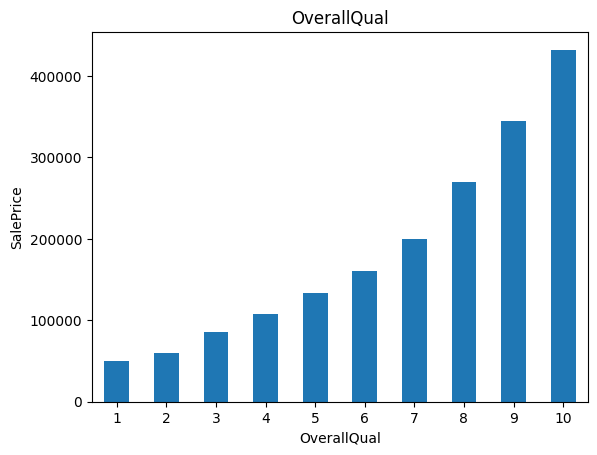

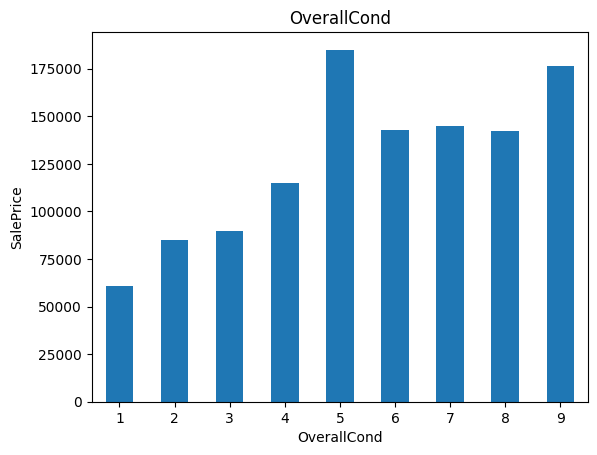

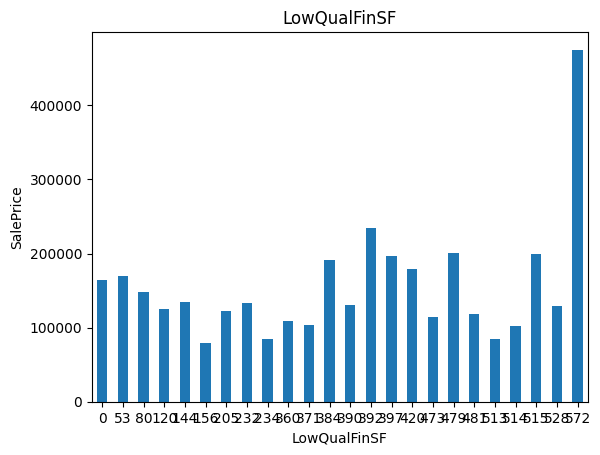

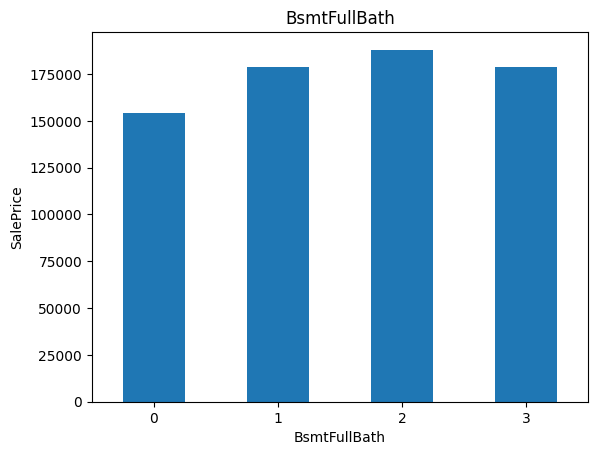

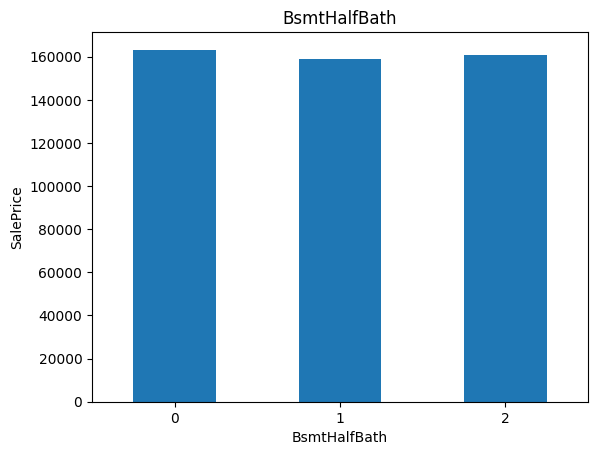

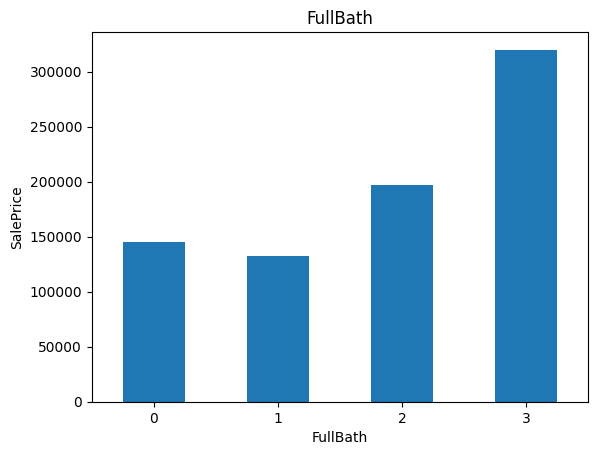

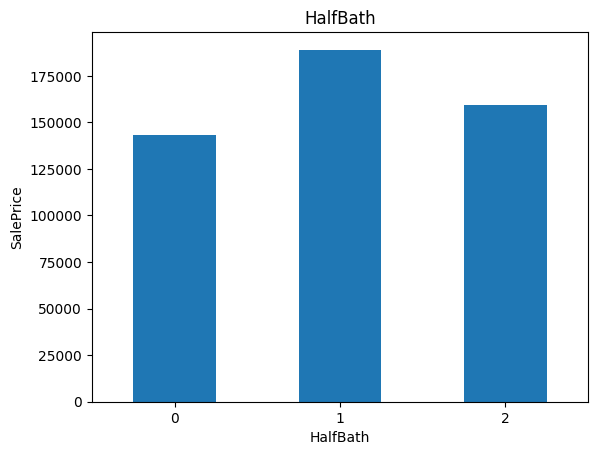

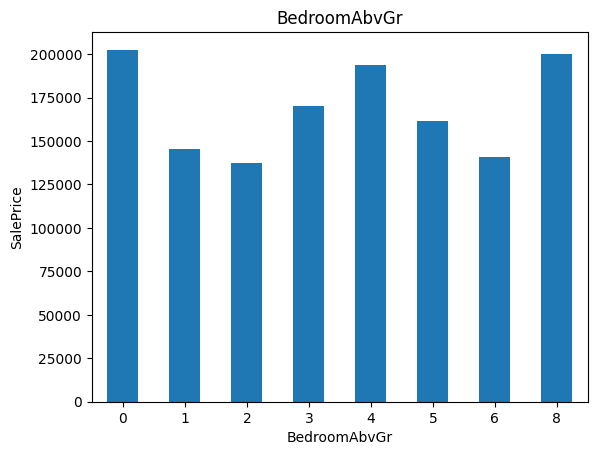

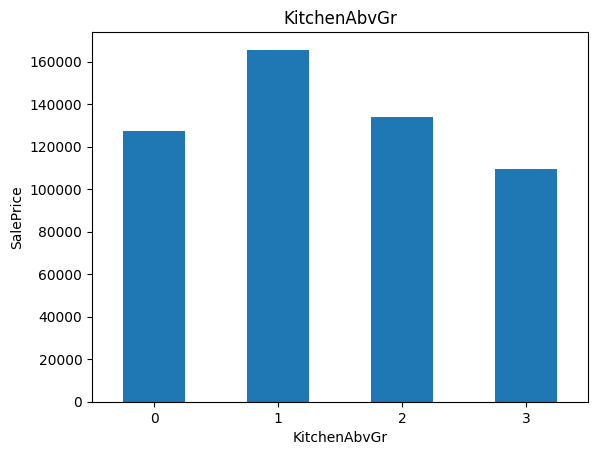

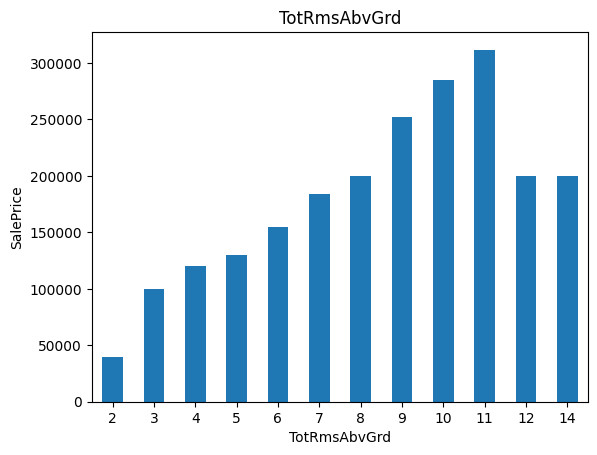

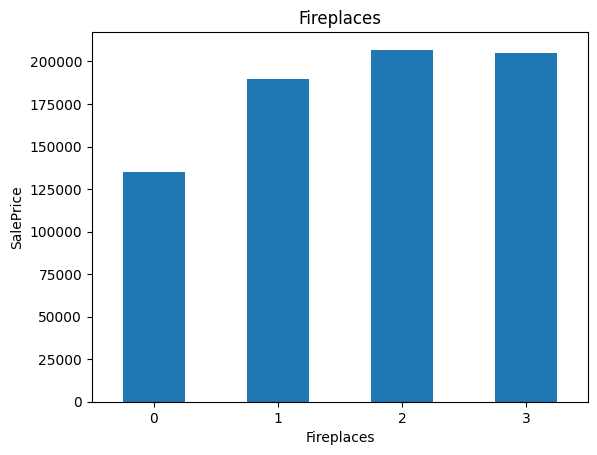

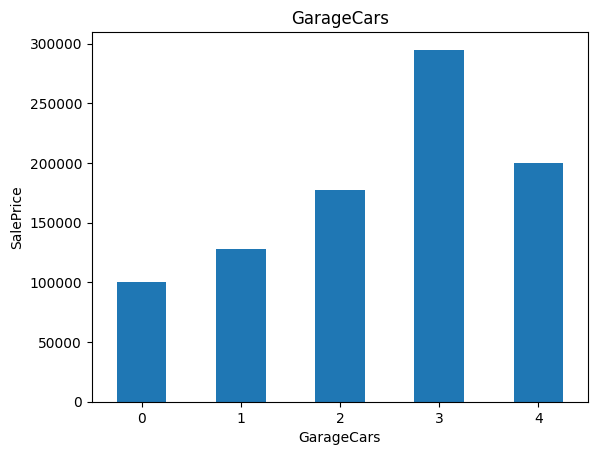

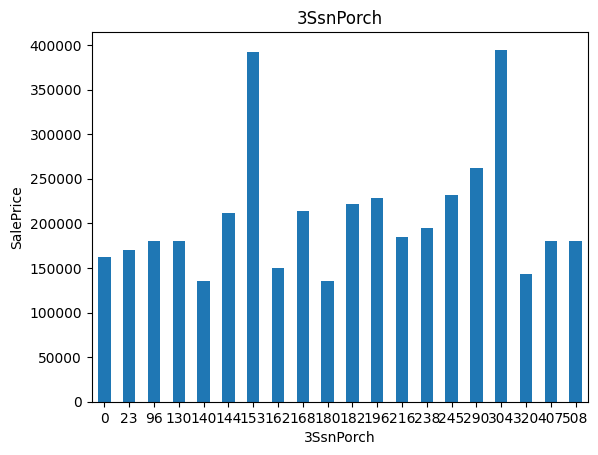

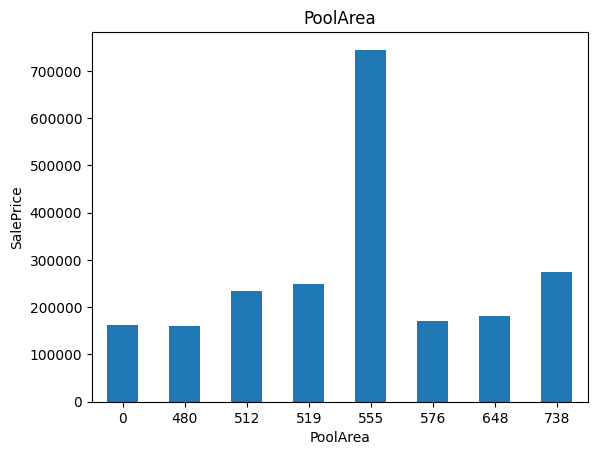

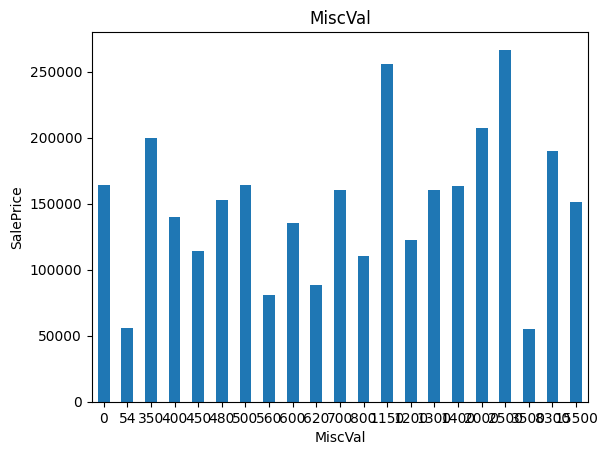

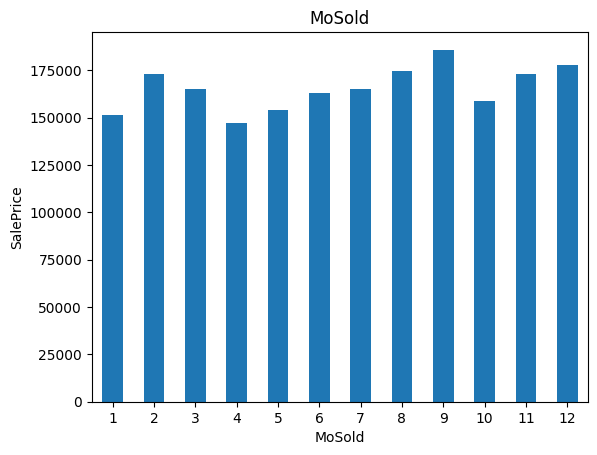

In [19]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_var:
    data= dataset.copy()
    
    data.groupby(feature)['SalePrice'].median().plot.bar(rot=0)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()
    

In [20]:
continuous_feature=[feature for feature in numerical_var if feature not in discrete_var+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


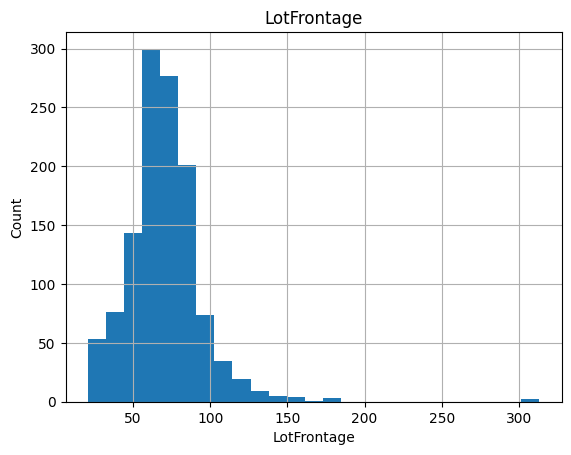

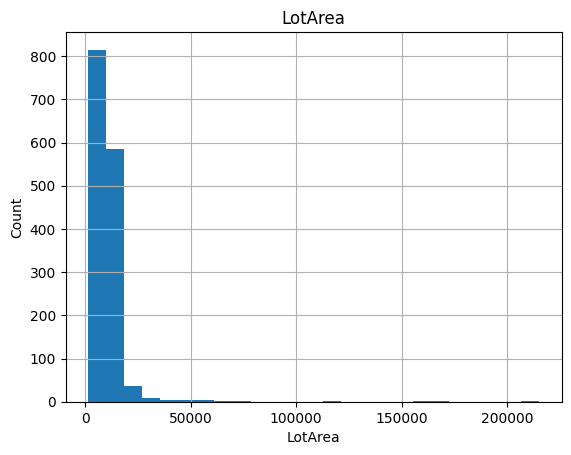

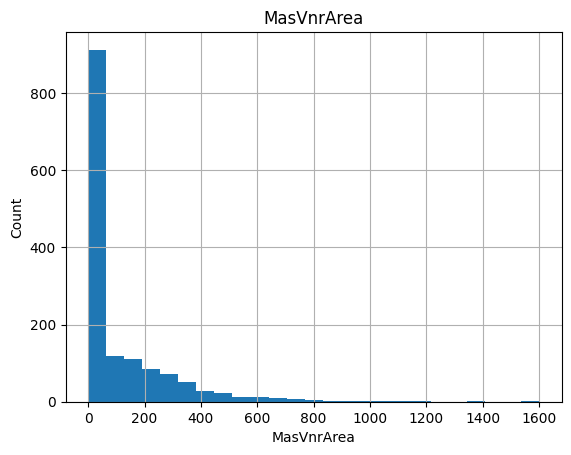

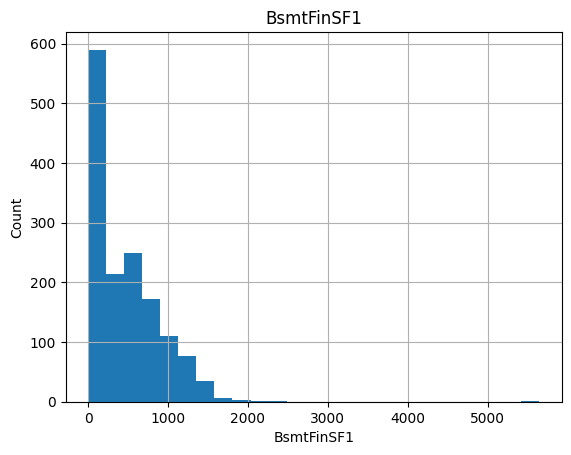

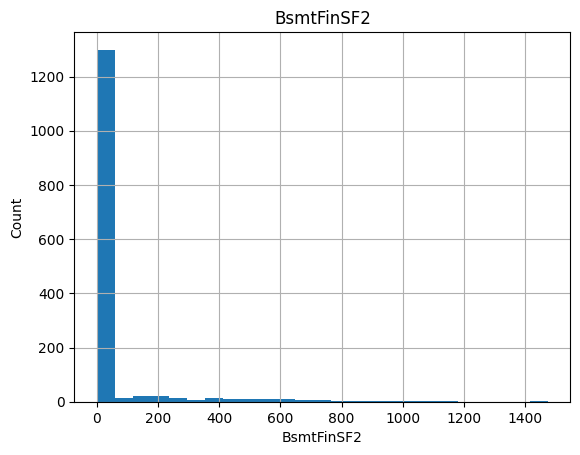

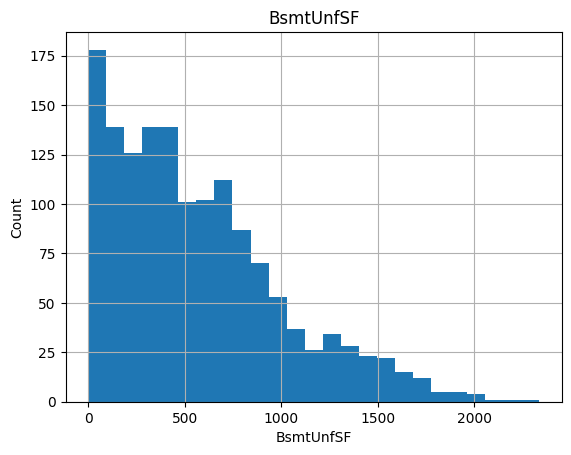

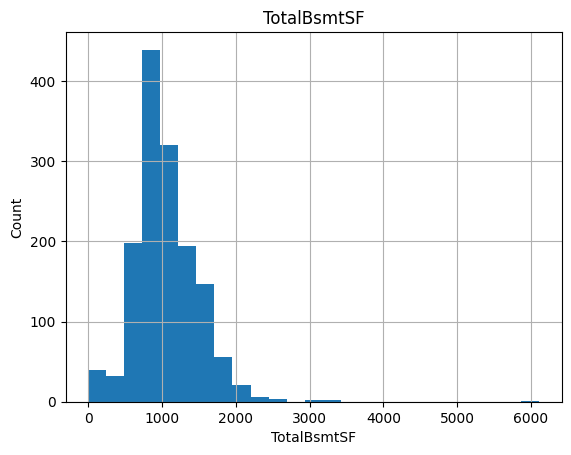

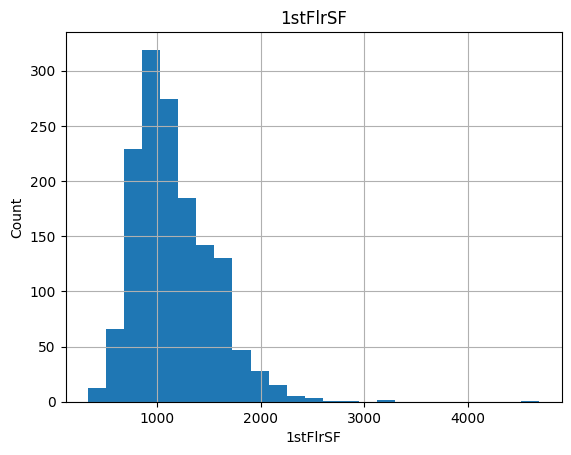

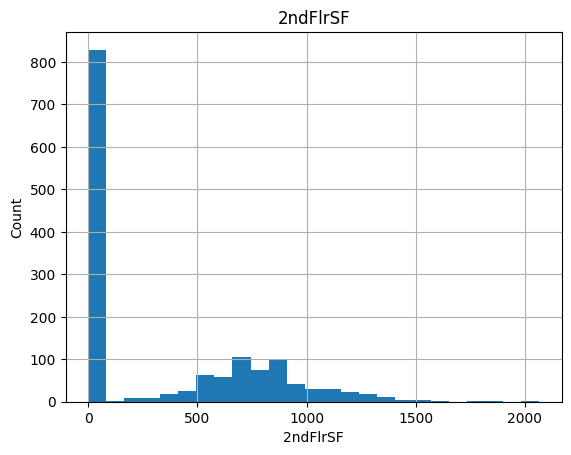

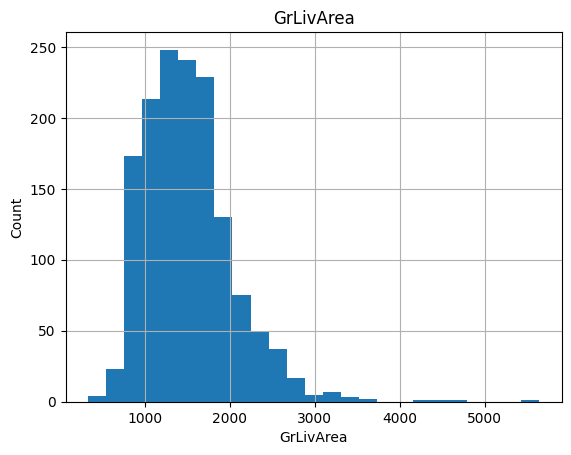

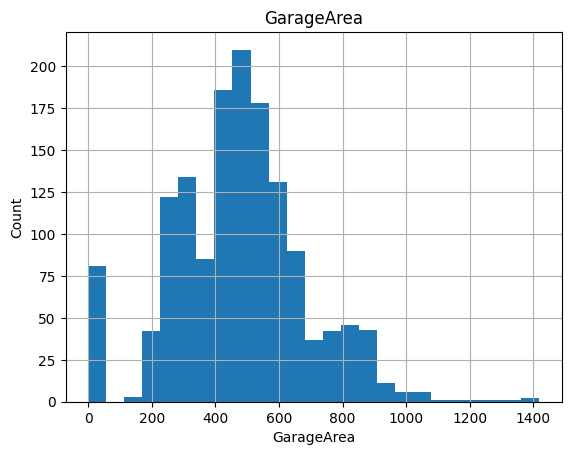

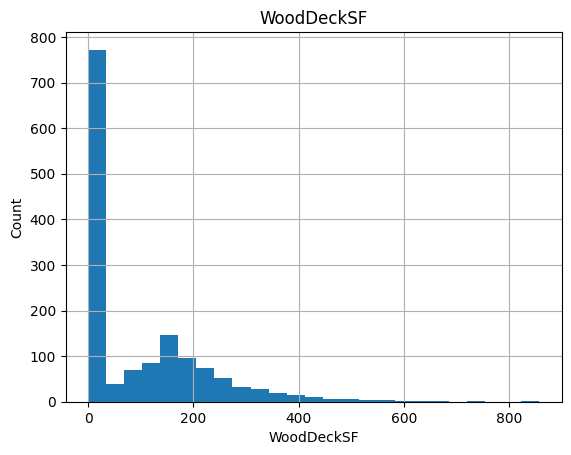

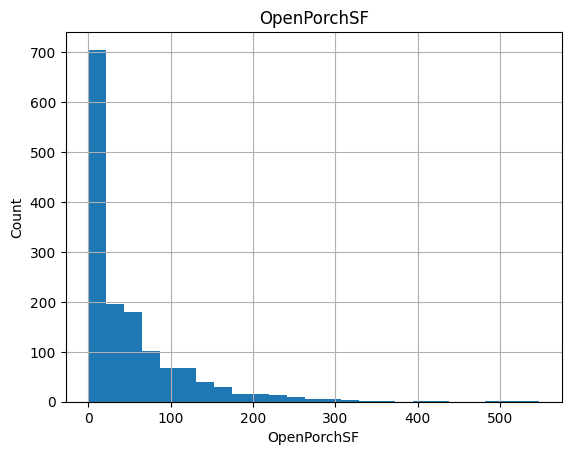

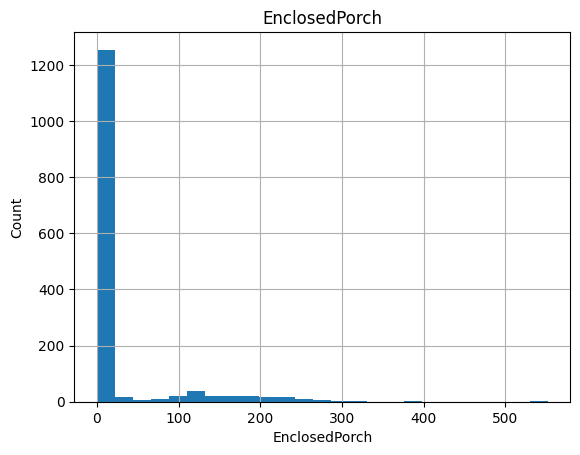

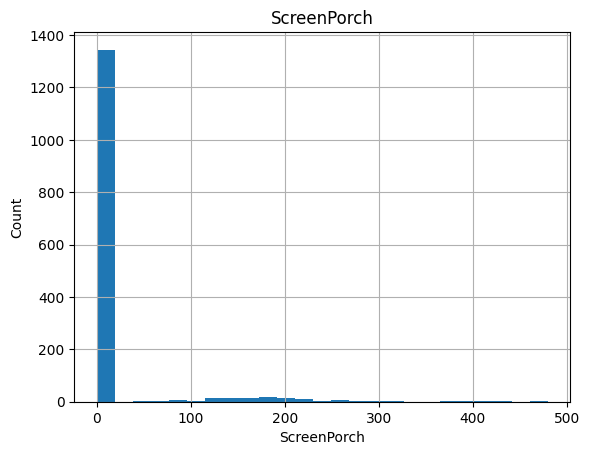

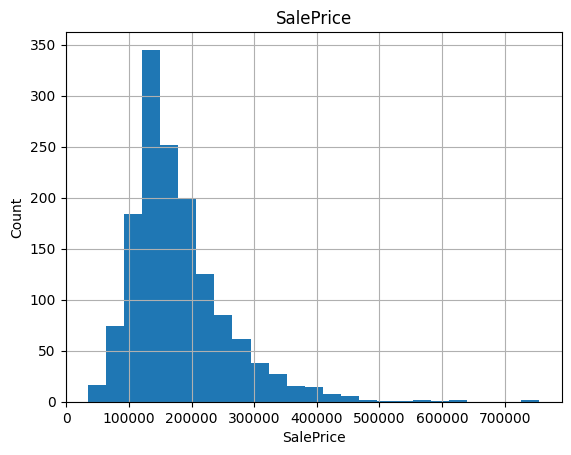

In [21]:

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


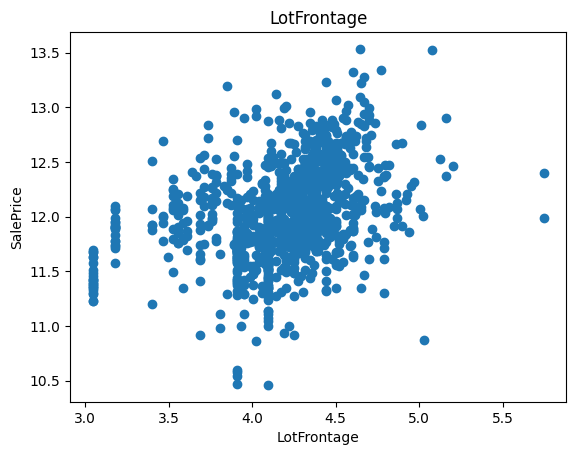

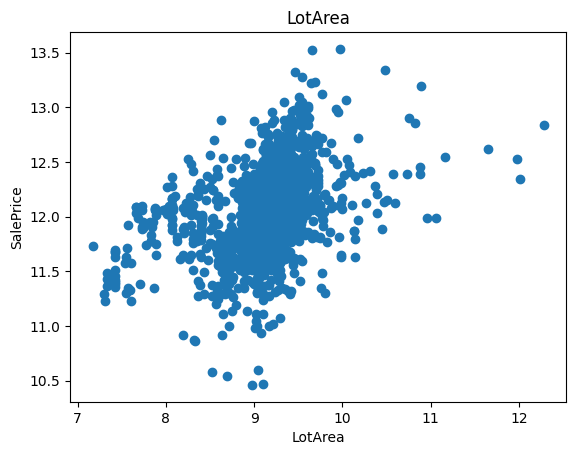

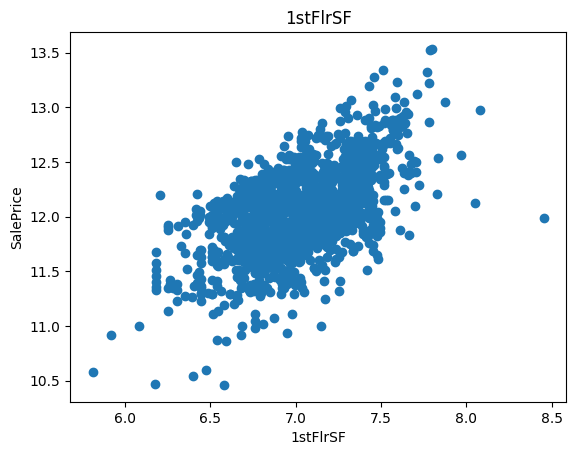

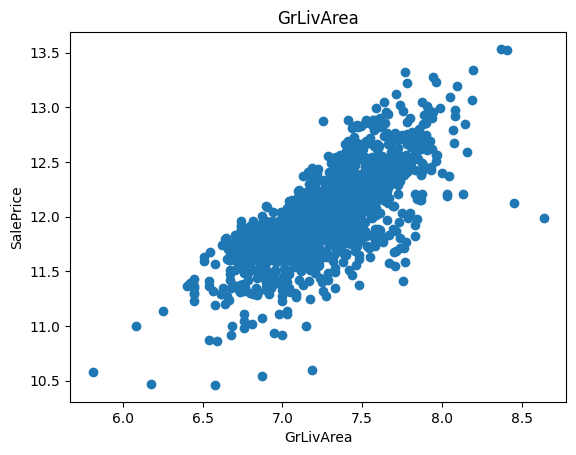

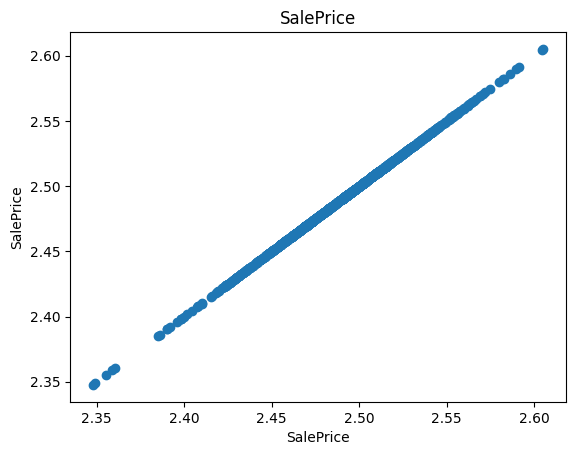

In [22]:
for feature in continuous_feature:
    data= dataset.copy()
    
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]= np.log(data[feature]) # this a log normal distribution (logarithmique transformation)
        data['SalePrice']= np.log(data['SalePrice']) # bcz the distribution is skwed in the last hist plot of saleprice
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()

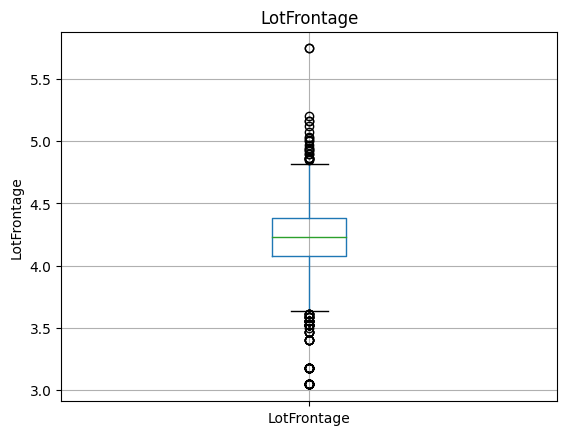

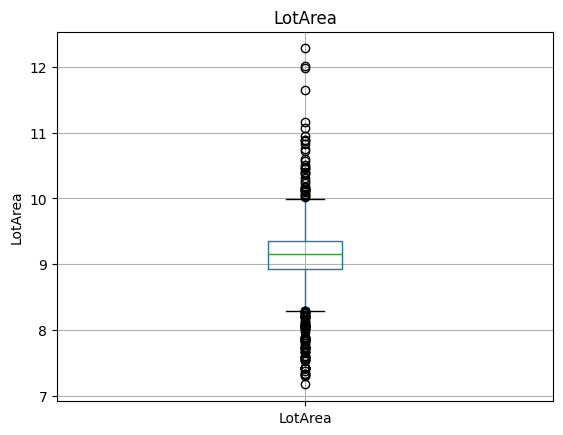

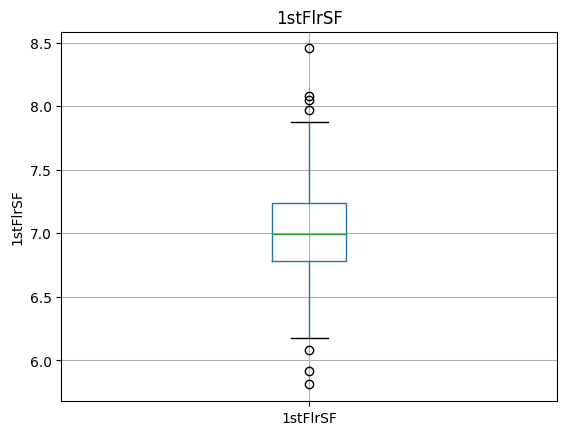

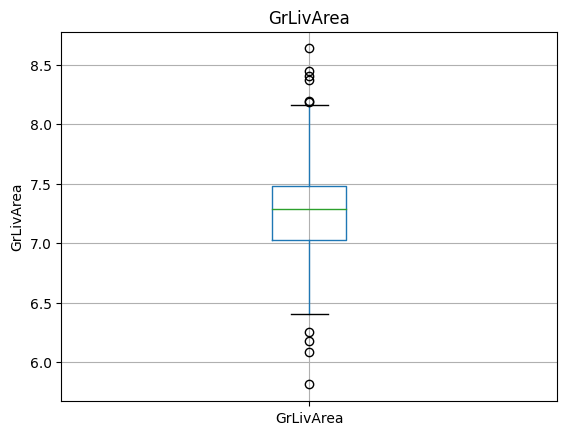

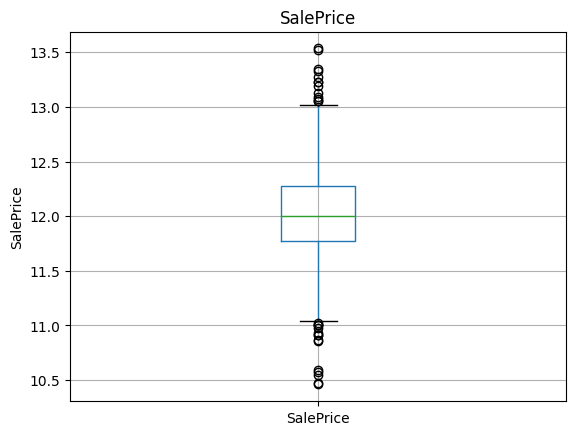

In [23]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

### Catgorical Variables

In [24]:
categorical_features= [feature for feature in dataset.columns if data[feature].dtype=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [25]:
dataset[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [26]:
for feature in categorical_features:
    print("The feature is {} and number of catagories are {}".format(feature,len(dataset[feature].unique())))

The feature is MSZoning and number of catagories are 5
The feature is Street and number of catagories are 2
The feature is Alley and number of catagories are 3
The feature is LotShape and number of catagories are 4
The feature is LandContour and number of catagories are 4
The feature is Utilities and number of catagories are 2
The feature is LotConfig and number of catagories are 5
The feature is LandSlope and number of catagories are 3
The feature is Neighborhood and number of catagories are 25
The feature is Condition1 and number of catagories are 9
The feature is Condition2 and number of catagories are 8
The feature is BldgType and number of catagories are 5
The feature is HouseStyle and number of catagories are 8
The feature is RoofStyle and number of catagories are 6
The feature is RoofMatl and number of catagories are 8
The feature is Exterior1st and number of catagories are 15
The feature is Exterior2nd and number of catagories are 16
The feature is MasVnrType and number of cata

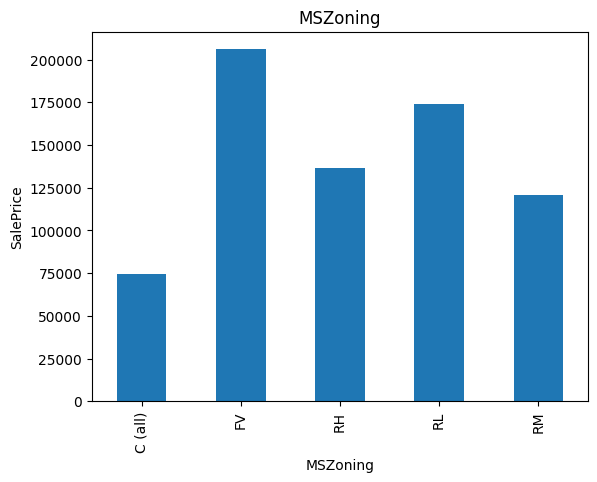

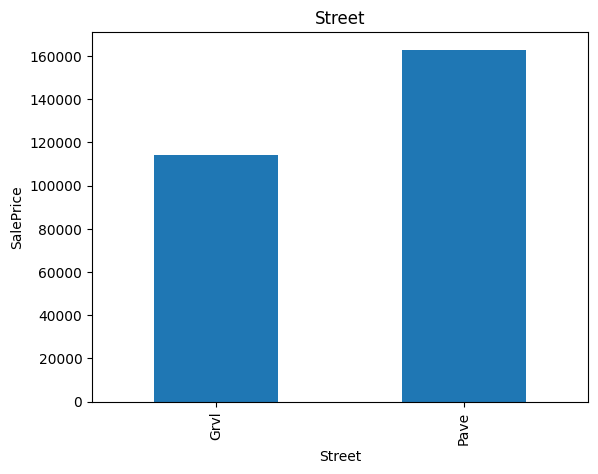

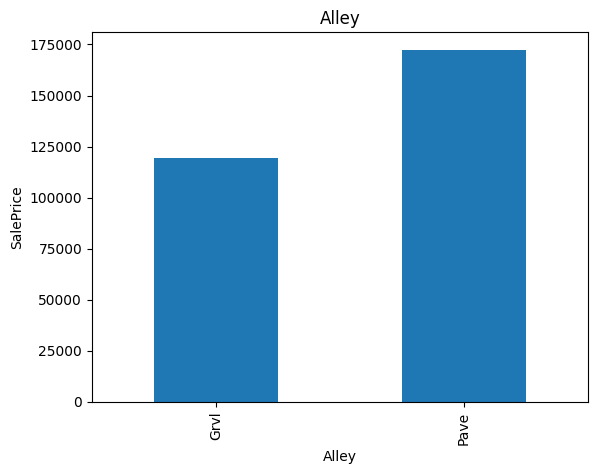

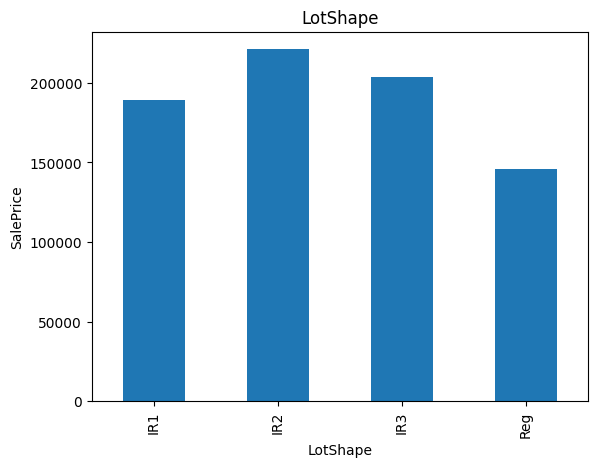

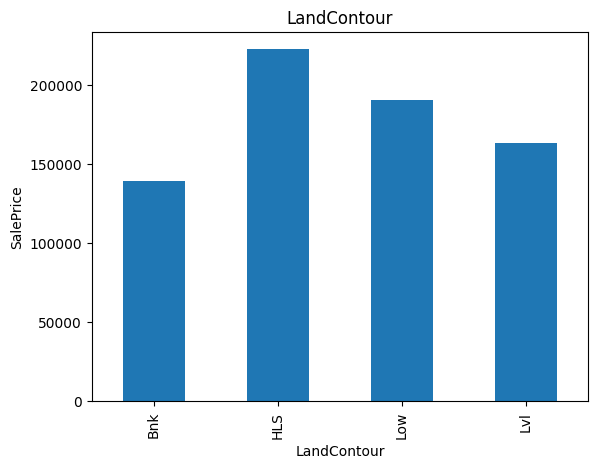

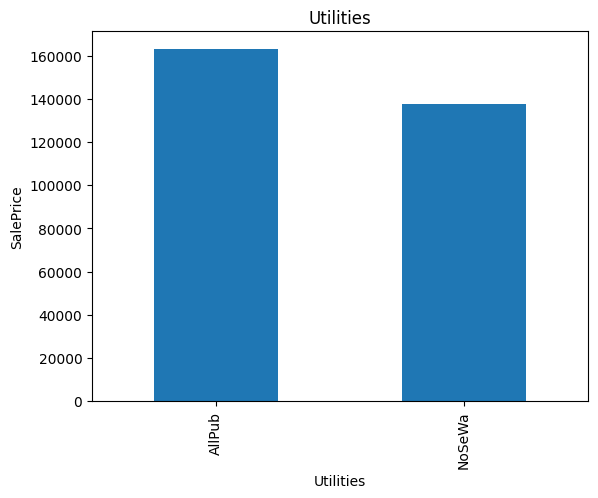

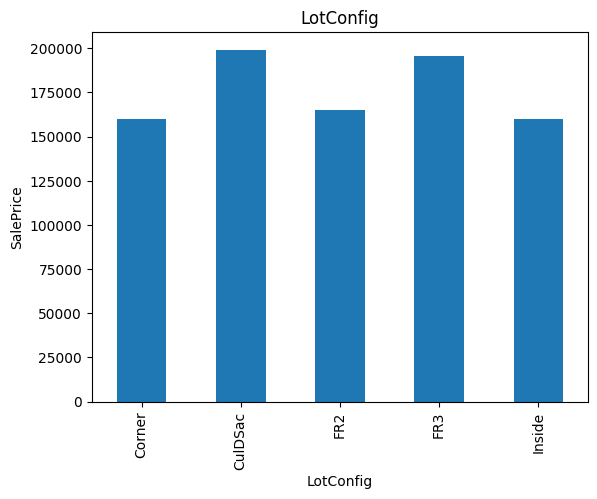

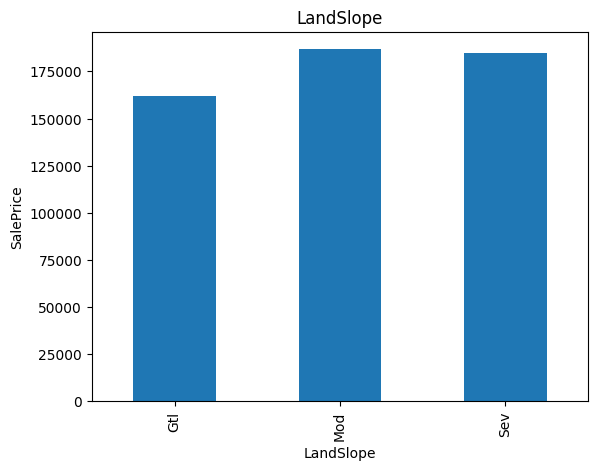

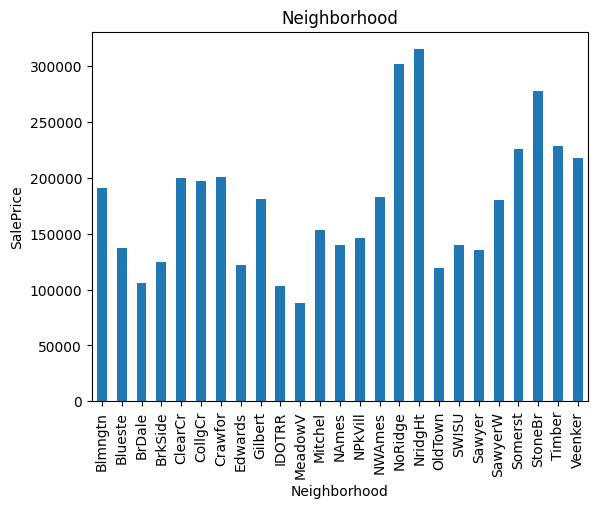

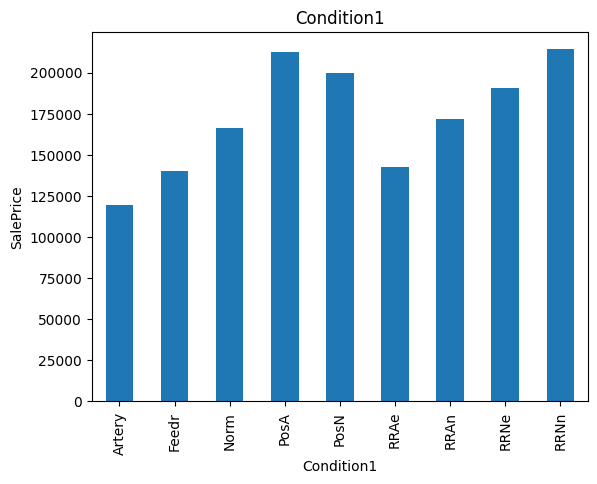

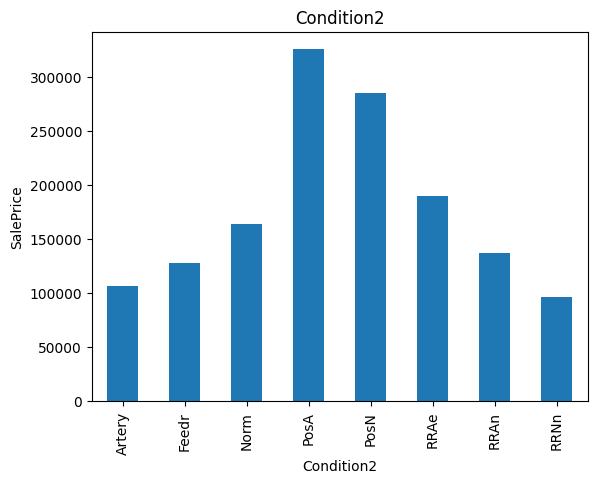

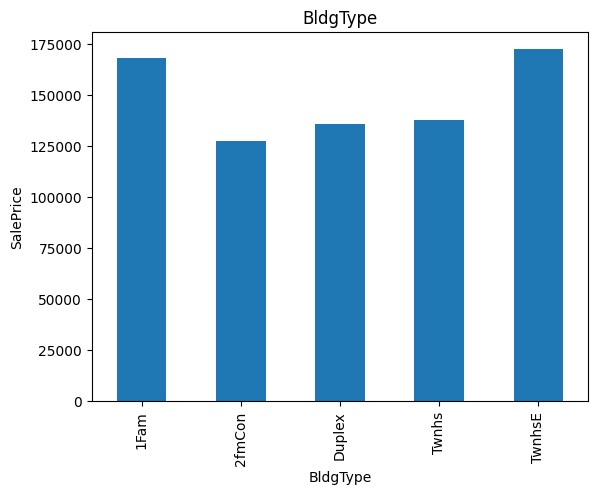

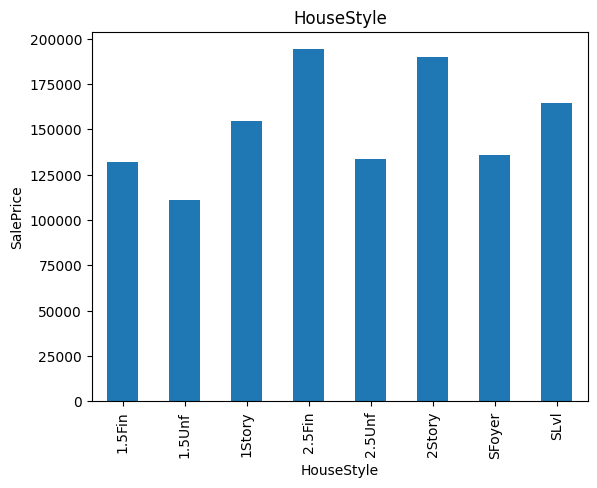

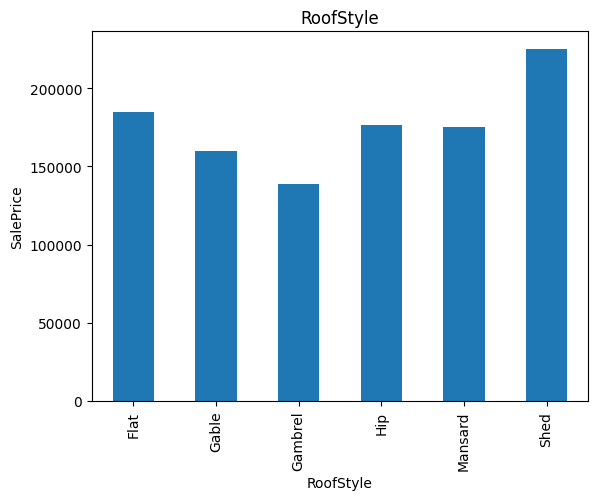

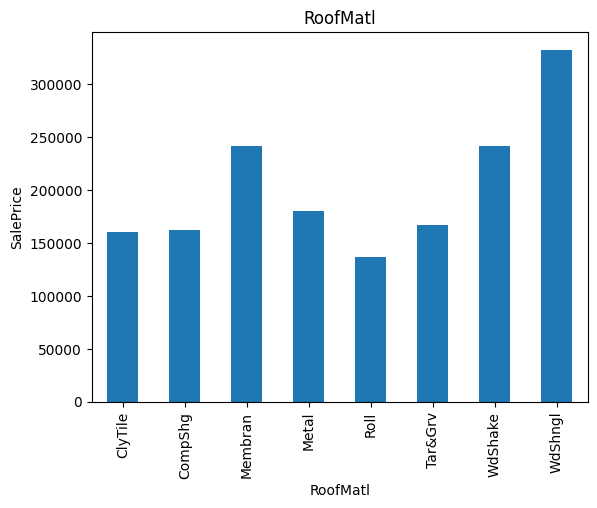

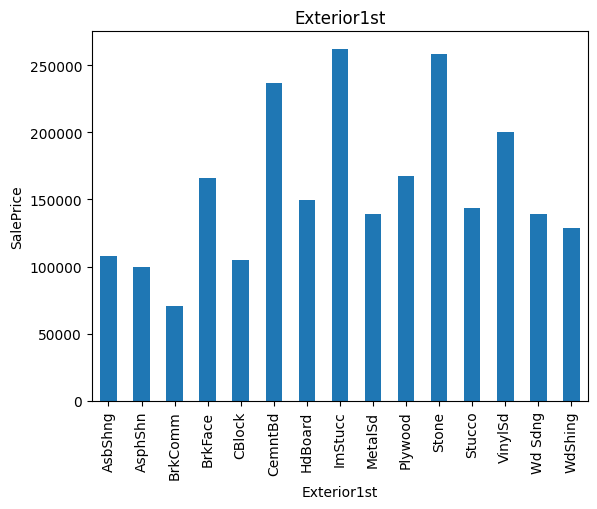

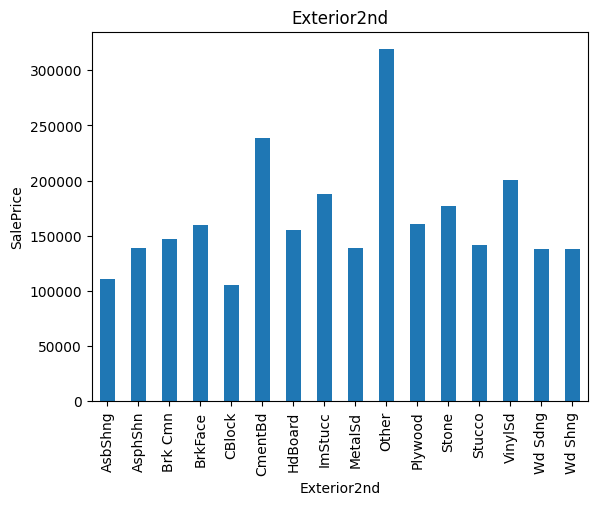

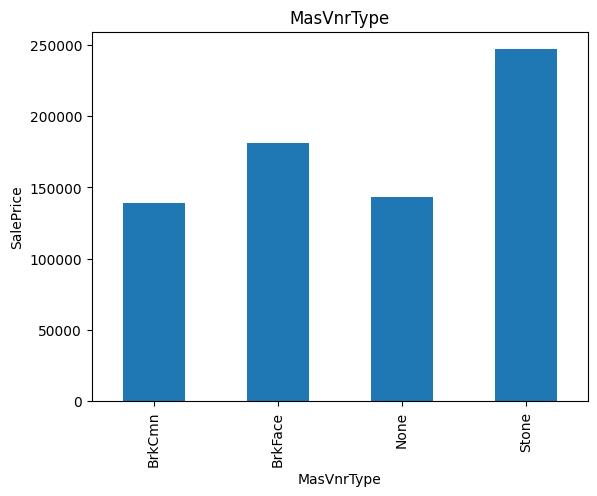

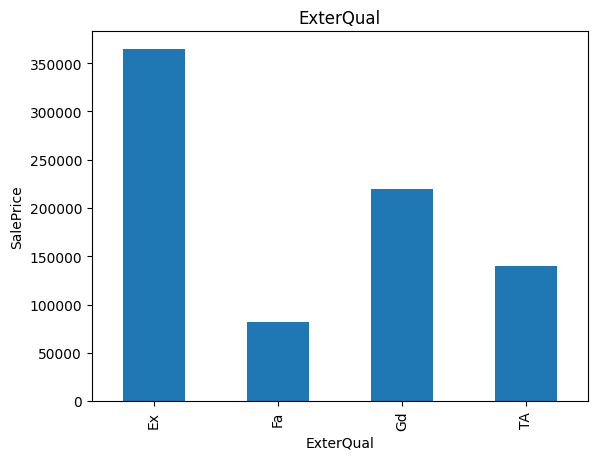

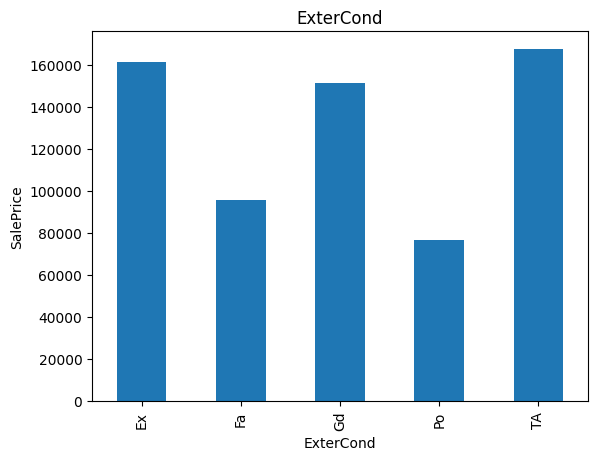

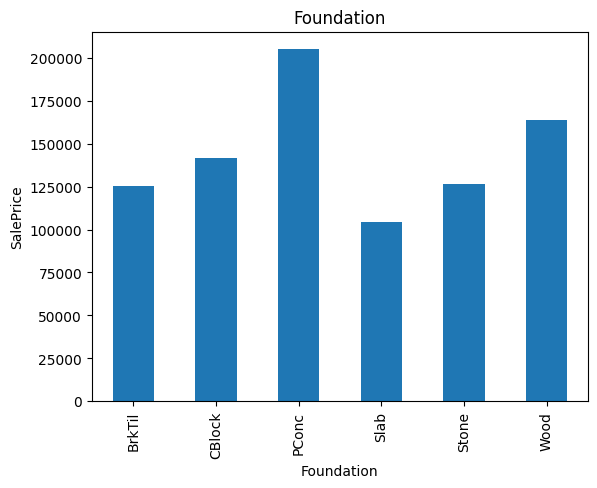

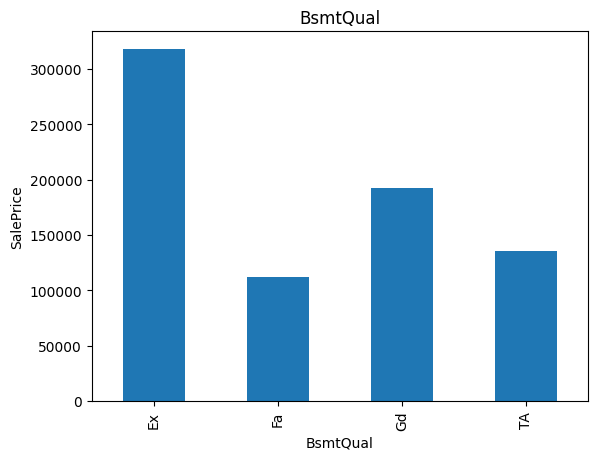

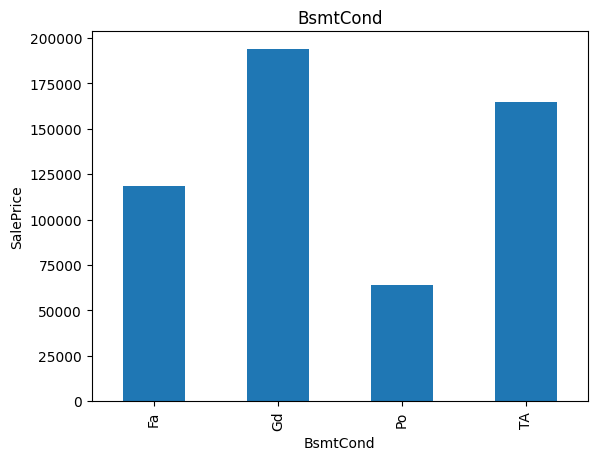

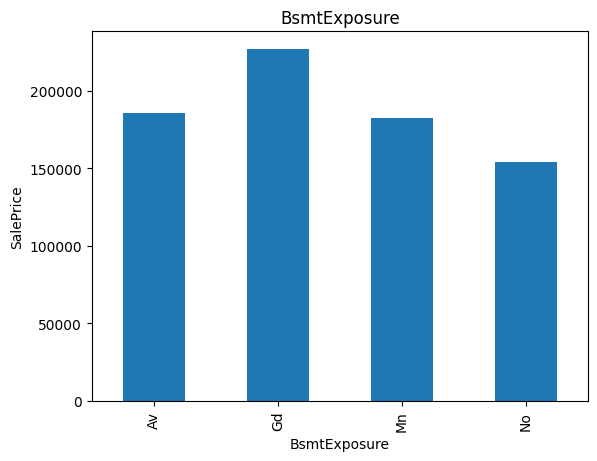

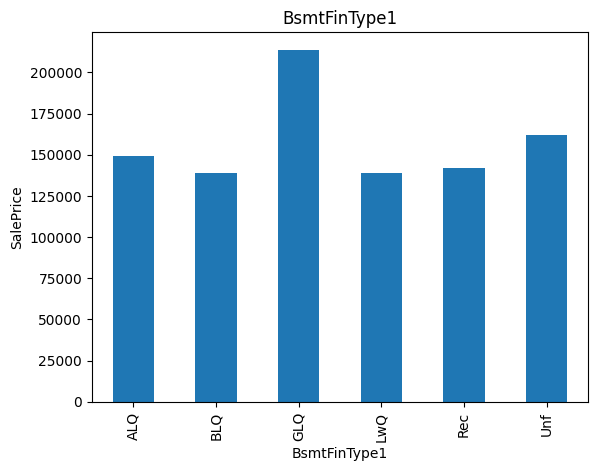

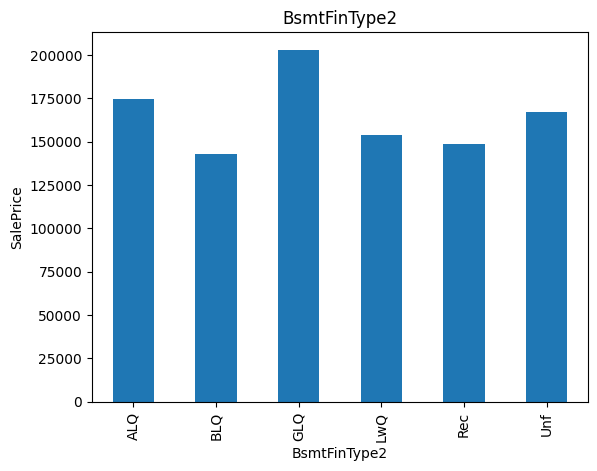

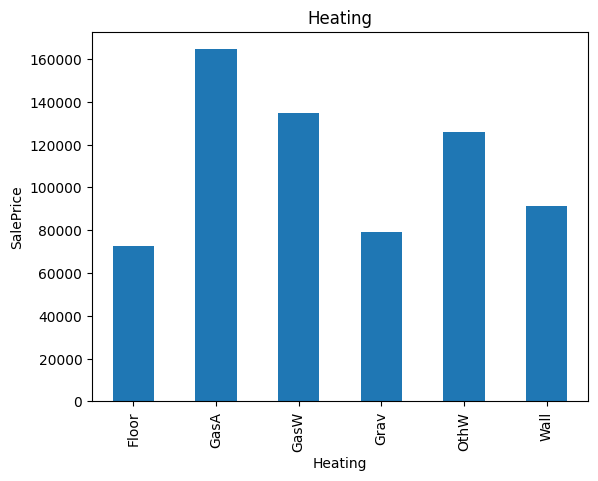

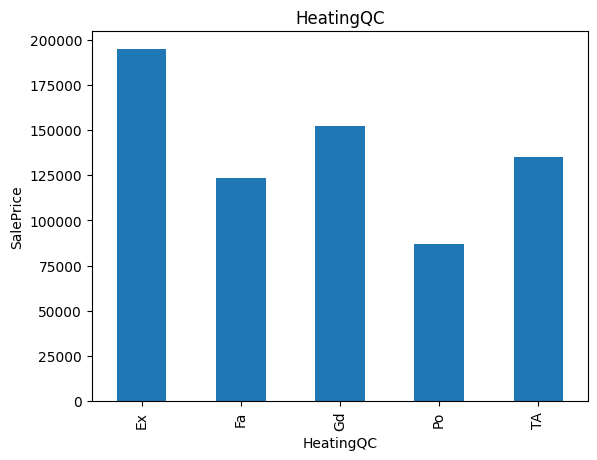

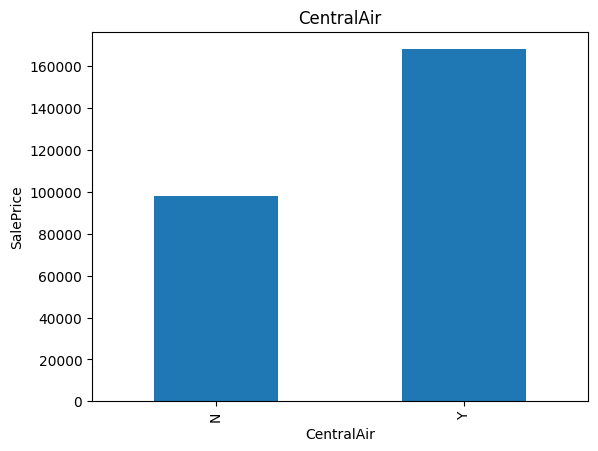

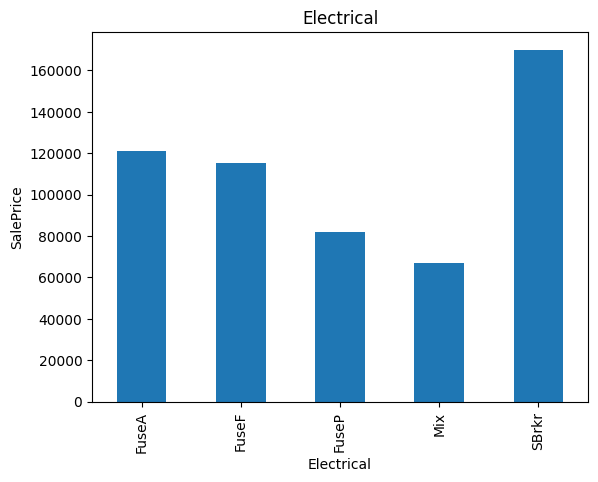

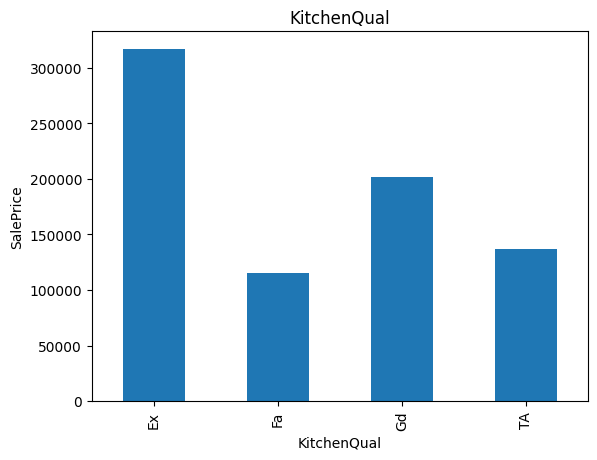

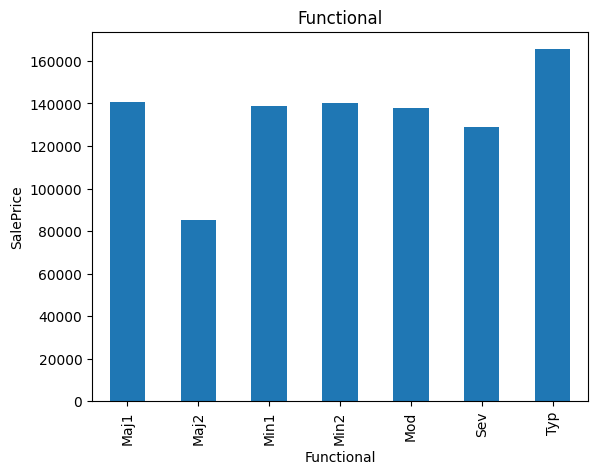

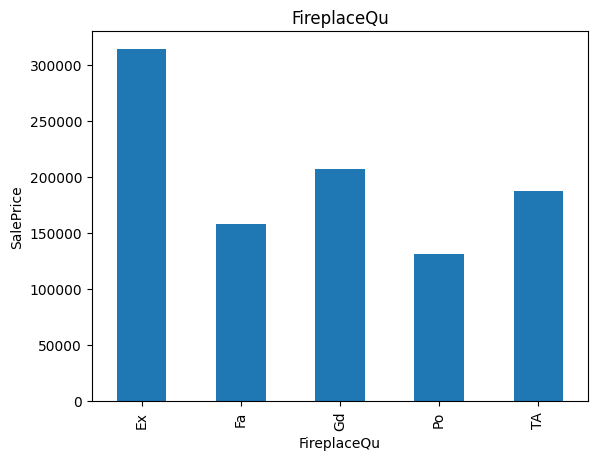

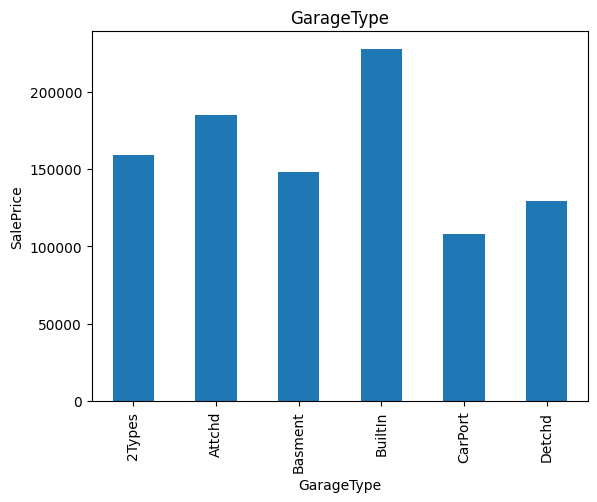

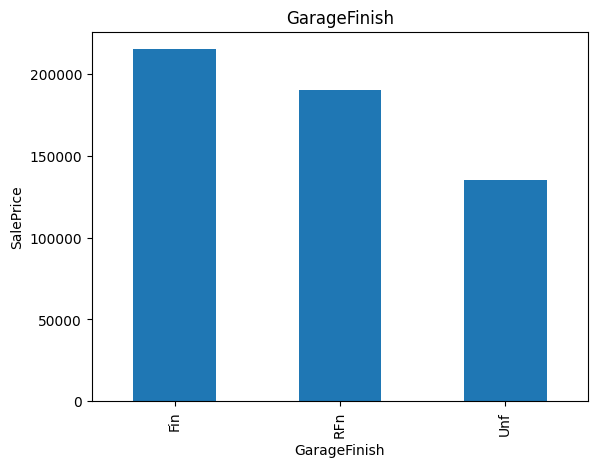

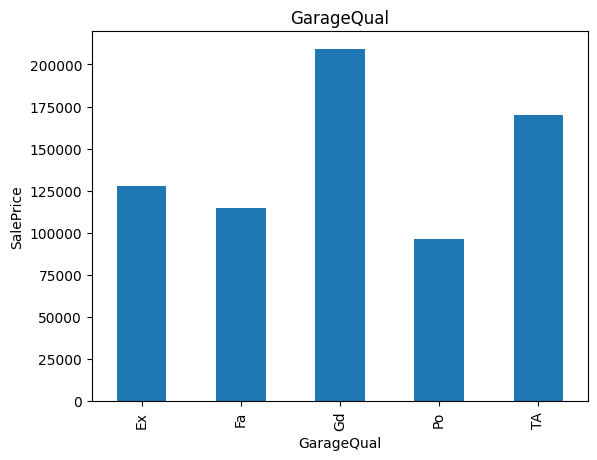

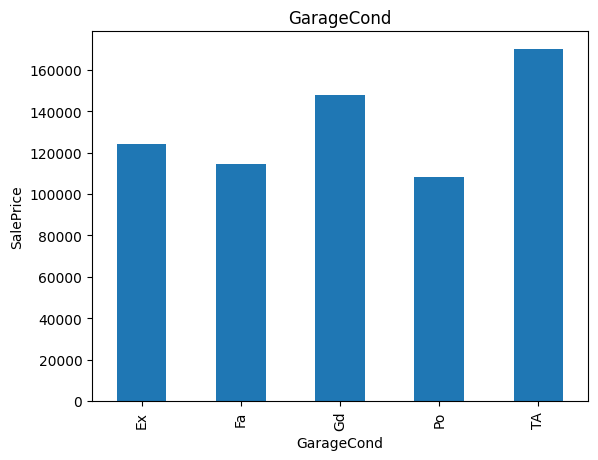

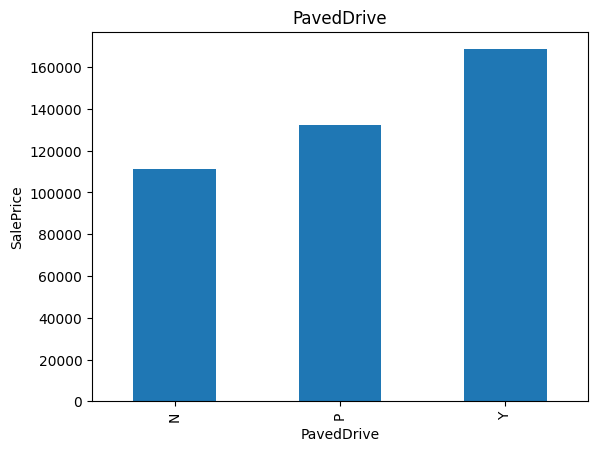

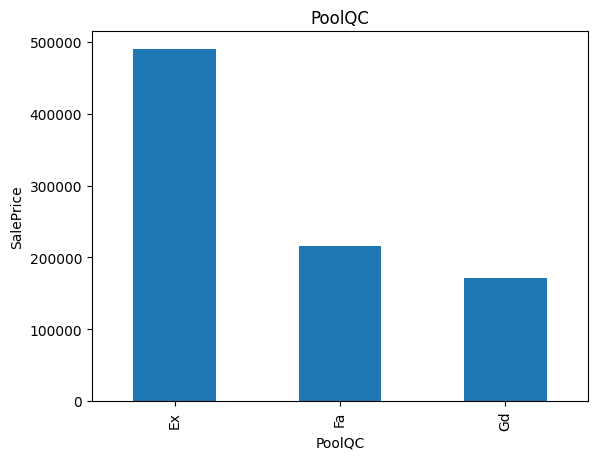

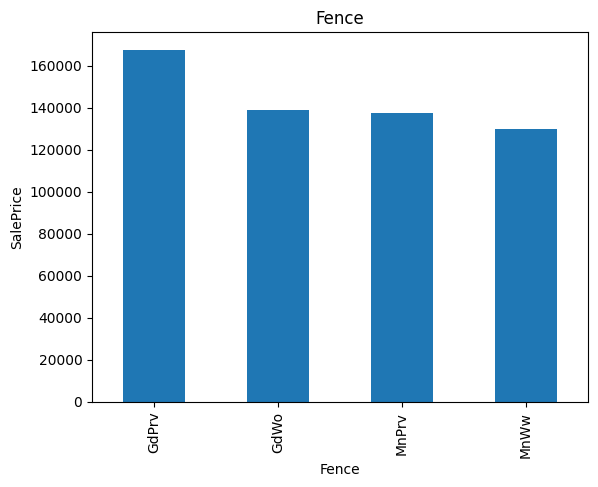

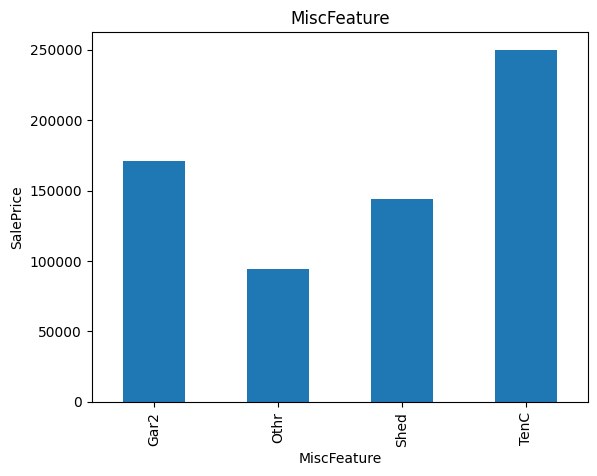

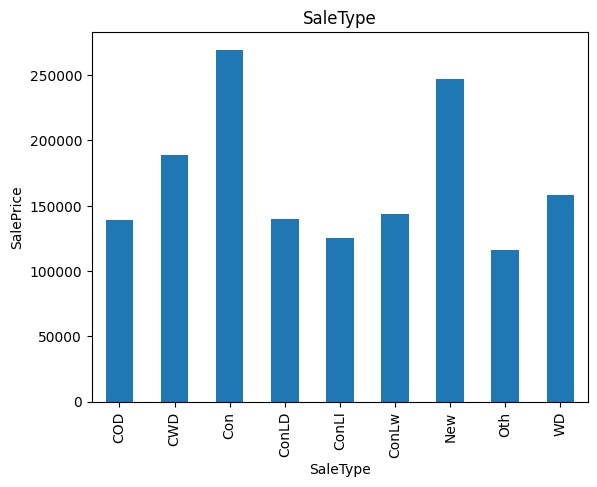

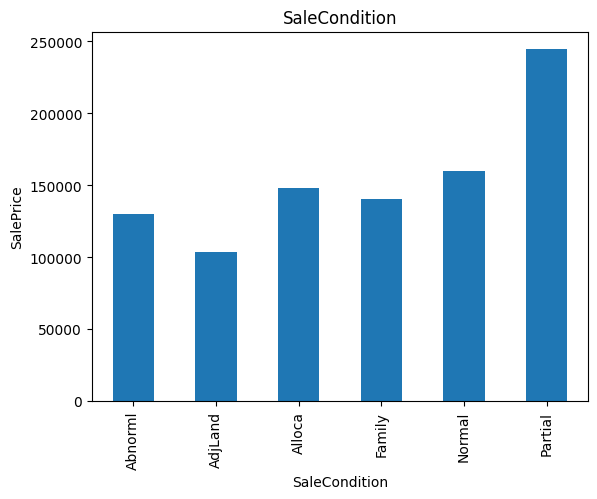

In [27]:
### Find out the relationship between catgorical features and the independent feature
for feature in categorical_features:
    data= dataset.copy()
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

### Feature Engineering

We will be performing all the below steps in Feature Engineering

1. Missing values
2. Temporal variables
3. Categorical variables: remove rare labels
4. Standarise the values of the variables to the same range

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset,dataset['SalePrice'],test_size=0.1,random_state=0)

In [29]:
## Null values in categorical features

In [30]:
features_nan= [feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']
features_nan

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [31]:
for feature in features_nan:
    print("{}: {}% missing values".format(feature, np.round(dataset[feature].isnull().mean(),4)))

Alley: 0.9377% missing values
MasVnrType: 0.0055% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


In [32]:
### Replace Nan with new values

def replace_cat_features(dataset, features_nan):
    data= dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data


In [33]:
dataset= replace_cat_features(dataset, features_nan)
dataset[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [34]:
numerical_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtype!='O']
numerical_nan

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [35]:
for feature in numerical_nan:
    print("{}: {} % missing values".format(feature, np.round(dataset[feature].isnull().mean(), 4)))

LotFrontage: 0.1774 % missing values
MasVnrArea: 0.0055 % missing values
GarageYrBlt: 0.0555 % missing values


In [36]:
## Replace nan in numrical features with median

for feature in numerical_nan:
    median_value= dataset[feature].median()
    
    #create new feature to capture nan values
    
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value, inplace=True)

In [37]:
dataset[numerical_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [38]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,250000,0,0,0


### Temperale Variables=> Date-Time variables

In [39]:
## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    dataset[feature]=dataset['YrSold']-dataset[feature]

In [40]:
dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [41]:
num_features=['LotFrontage', 'MasVnrArea', 'GarageYrBlt','SalePrice']
for feature in num_features:
    
    dataset[feature]=np.log(dataset[feature])

C:\Users\Mariam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [42]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,8450,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9600,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,11250,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9550,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,14260,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


In [43]:
# Handle Rare Catgorical Feature

In [44]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']

In [45]:
for feature in categorical_features:
    temp=dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    print(temp_df)
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')
    #print(dataset[feature])

Index(['FV', 'RH', 'RL', 'RM'], dtype='object', name='MSZoning')
Index(['Pave'], dtype='object', name='Street')
Index(['Grvl', 'Missing', 'Pave'], dtype='object', name='Alley')
Index(['IR1', 'IR2', 'Reg'], dtype='object', name='LotShape')
Index(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='object', name='LandContour')
Index(['AllPub'], dtype='object', name='Utilities')
Index(['Corner', 'CulDSac', 'FR2', 'Inside'], dtype='object', name='LotConfig')
Index(['Gtl', 'Mod'], dtype='object', name='LandSlope')
Index(['Blmngtn', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor',
       'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NWAmes',
       'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW',
       'Somerst', 'StoneBr', 'Timber'],
      dtype='object', name='Neighborhood')
Index(['Artery', 'Feedr', 'Norm', 'PosN', 'RRAn'], dtype='object', name='Condition1')
Index(['Norm'], dtype='object', name='Condition2')
Index(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtyp

In [46]:
dataset.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,8450,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9600,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,11250,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9550,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,14260,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,12.429216,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,4.234107,9765,Pave,Missing,IR2,Lvl,AllPub,...,Shed,480,4,2009,WD,Normal,12.128111,1,0,0
96,97,20,RL,4.356709,10264,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,8,2006,WD,Normal,12.273731,0,0,0
97,98,20,RL,4.290459,10921,Pave,Missing,Reg,HLS,AllPub,...,Missing,0,5,2007,WD,Normal,11.458997,0,0,0
98,99,30,RL,4.442651,10625,Pave,Missing,Reg,Lvl,AllPub,...,Shed,400,5,2010,COD,Abnorml,11.326596,0,0,0


In [47]:
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [48]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['Id','SalePerice'] ]
len(scaling_feature)

83

In [49]:
feature_scale=[feature for feature in dataset.columns if feature not in ['Id','SalePrice']]



In [50]:
import numpy as np
print(np.any(np.isinf(dataset[feature_scale])))
print(np.any(np.isnan(dataset[feature_scale])))

True
False


In [51]:
dataset[feature_scale] = np.log1p(dataset[feature_scale])

In [52]:
rows_with_infinity = dataset[dataset[feature_scale].apply(lambda x: np.any(np.isinf(x)), axis=1)]
rows_with_infinity

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
523,524,4.110874,1.386294,1.769435,10.599007,0.693147,1.098612,0.693147,0.0,0.693147,...,1.098612,0.0,2.397895,7.604894,1.386294,1.609438,12.126759,0.0,0.0,0.0


In [53]:
dataset = dataset[~dataset.index.isin(rows_with_infinity.index)]
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,4.110874,1.386294,1.643721,9.042040,0.693147,1.098612,0.000000,0.693147,0.693147,...,1.098612,0.000000,1.098612,7.605392,1.098612,1.386294,12.247694,0.0,0.0,0.0
1,2,3.044522,1.386294,1.683065,9.169623,0.693147,1.098612,0.000000,0.693147,0.693147,...,1.098612,0.000000,1.791759,7.604894,1.098612,1.386294,12.109011,0.0,0.0,0.0
2,3,4.110874,1.386294,1.652403,9.328212,0.693147,1.098612,0.693147,0.693147,0.693147,...,1.098612,0.000000,2.302585,7.605392,1.098612,1.386294,12.317167,0.0,0.0,0.0
3,4,4.262680,1.386294,1.628131,9.164401,0.693147,1.098612,0.693147,0.693147,0.693147,...,1.098612,0.000000,1.098612,7.604396,1.098612,0.000000,11.849398,0.0,0.0,0.0
4,5,4.110874,1.386294,1.692090,9.565284,0.693147,1.098612,0.693147,0.693147,0.693147,...,1.098612,0.000000,2.564949,7.605392,1.098612,1.386294,12.429216,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,4.110874,1.386294,1.634547,8.976894,0.693147,1.098612,0.000000,0.693147,0.693147,...,1.098612,0.000000,2.197225,7.604894,1.098612,1.386294,12.072541,0.0,0.0,0.0
1456,1457,3.044522,1.386294,1.694266,9.486152,0.693147,1.098612,0.000000,0.693147,0.693147,...,1.098612,0.000000,1.098612,7.606387,1.098612,1.386294,12.254863,0.0,0.0,0.0
1457,1458,4.262680,1.386294,1.646667,9.109746,0.693147,1.098612,0.000000,0.693147,0.693147,...,0.693147,7.824446,1.791759,7.606387,1.098612,1.386294,12.493130,0.0,0.0,0.0
1458,1459,3.044522,1.386294,1.652403,9.181735,0.693147,1.098612,0.000000,0.693147,0.693147,...,1.098612,0.000000,1.609438,7.606387,1.098612,1.386294,11.864462,0.0,0.0,0.0


In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [55]:
scaler.transform(dataset[feature_scale])

array([[0.48300349, 0.86135312, 0.48152769, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.86135312, 0.55842919, ..., 0.        , 0.        ,
        0.        ],
       [0.48300349, 0.86135312, 0.49849774, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.55176396, 0.86135312, 0.48728638, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.86135312, 0.49849774, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.86135312, 0.53484909, ..., 0.        , 0.        ,
        0.        ]])

In [56]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([dataset[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [57]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.483003,0.861353,0.481528,0.366271,1.0,1.0,0.0,0.5,...,1.0,1.0,0.0,0.216618,0.500249,0.792481,0.861353,0.0,0.0,0.0
1,2,12.109011,0.000000,0.861353,0.558429,0.391245,1.0,1.0,0.0,0.5,...,1.0,1.0,0.0,0.586928,0.250187,0.792481,0.861353,0.0,0.0,0.0
2,3,12.317167,0.483003,0.861353,0.498498,0.422289,1.0,1.0,0.5,0.5,...,1.0,1.0,0.0,0.859833,0.500249,0.792481,0.861353,0.0,0.0,0.0
3,4,11.849398,0.551764,0.861353,0.451056,0.390223,1.0,1.0,0.5,0.5,...,1.0,1.0,0.0,0.216618,0.000000,0.792481,0.000000,0.0,0.0,0.0
4,5,12.429216,0.483003,0.861353,0.576068,0.468694,1.0,1.0,0.5,0.5,...,1.0,1.0,0.0,1.000000,0.500249,0.792481,0.861353,0.0,0.0,0.0


In [58]:
data.to_csv("X_train_clean.csv", index=False)